# Overfitting

### Imports and Dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_pickle('../training_dataset_task3/task_3_training_e8da4715deef7d56_f8b7378_pandas.pkl').reset_index()

# only low and mid level features in X
X = df.loc[:, 'essentia_dissonance_mean':'mirtoolbox_roughness_pct_90']
y = df['quadrant']

### Cross Validation - hold out on segment 26, used for final testing

In [3]:
from sklearn.model_selection import cross_val_score

# add segment ID to feature space
X['segment_id'] = df['segment_id']

# pick segment 26 for final evaluation
final_test_X = X[X['segment_id']==26]
final_test_y = y[X['segment_id']==26]

# drop segment ID column
final_test_X = final_test_X.drop(['segment_id'], axis=1)



# drop segment 26 from dataset to use for final evaluation, y first
y = y.drop(X[X['segment_id']==26].index, axis=0)
X = X.drop(X[X['segment_id']==26].index, axis=0)

# drop segment ID column
X = X.drop(['segment_id'], axis=1)



# preprocess dataset
X_std = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_std, columns=X.columns)

### Train Test Set Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
# def performance(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
#     # training set
#     predictiontrain = best_random.predict(X_train)
#     accuracytrain = accuracy_score(y_train, predictiontrain)
    
#     crossvaltrain = cross_val_score(best_random, X_train, y_train)
#     print(f'Training Set:\nAccuracy: {accuracytrain}\nCrossVal: {crossvaltrain.mean()}')
    
#     # test set
#     predictiontest = best_random.predict(X_test)
#     accuracytest = accuracy_score(y_test, predictiontest)
    
#     crossvaltest = cross_val_score(best_random, X_test, y_test)
#     print(f'\nTest Set:\nAccuracy: {accuracytest}\nCrossVal: {crossvaltest.mean()}')


def performance(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    # training set
    train = model.score(X_train, y_train)
    print(f'Training Set:\n{train}')
    
    # test set
    test = model.score(X_test, y_test)
    print(f'\nTest Set:\n{test}')

In [6]:
# for reference, this is how the best random model performs
best_random = RandomForestClassifier(bootstrap=False, max_depth=90, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
best_random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=90, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200)

In [1]:
# performance(best_random)

## Overfitting

### low number of n_estimators

In [8]:
of_estimators = RandomForestClassifier(n_estimators=3)
of_estimators.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

In [9]:
performance(of_estimators)

Training Set:
0.8871515975526852

Test Set:
0.416551724137931


### smal number of min_samples_leaf

In [10]:
of_depth = RandomForestClassifier(min_samples_leaf=3)
of_depth.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3)

In [11]:
performance(of_depth)

Training Set:
0.9959211420802175

Test Set:
0.5006896551724138


## Plots

In [12]:
import matplotlib.pyplot as plt

def cross_val(model, kf=10):
    val = cross_val_score(estimator=model, X=X, y=y, cv=kf).mean()
    # print(val, 'for', model)
    return val

In [13]:
# n_estimators
# uncomment next line will take long

accuracies = [cross_val(RandomForestClassifier(n_estimators=i)) for i in range(1,200,10)]

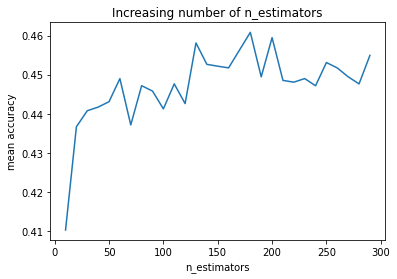

In [14]:
plt.plot(range(10,300,10), accuracies)
plt.title('Increasing number of n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('mean accuracy')
plt.show()

In [15]:
# min_samples_leaf
# uncomment next line will take long

accuracies2 = [cross_val(RandomForestClassifier(min_samples_leaf=i)) for i in range(1,50)]

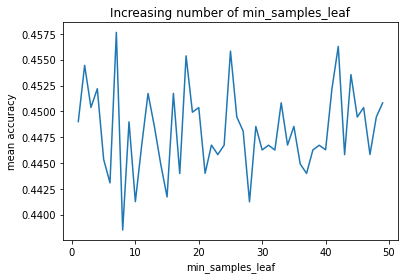

In [16]:
plt.plot(range(1,50), accuracies2)
plt.title('Increasing number of min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('mean accuracy')
plt.show()